Analysis of Relu,Sigmoid and Tanh Activations

MNIST Data from Kaggle is used as the sample data here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import layers
from models import MLP
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
train = pd.read_csv('dataset/MNIST_train.csv')
test = pd.read_csv('dataset/MNIST_test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print "train.shape = %s , test.shape = %s"%(train.shape,test.shape)

train.shape = (42000, 785) , test.shape = (28000, 784)


In [5]:
X = train.drop('label',axis=1).values
y = train['label'].values
X = X/255.0

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)

In [7]:
X_train.shape

(29400, 784)

In [26]:
input_size=784
hiddenSize1=50
hiddenSize2 = 25
output_size=10
model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='tanh')

In [27]:
model.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.35)

Iteration 0, loss = 3.395442
Validation Accuracy :0.144603
Iteration 500, loss = 0.632011
Validation Accuracy :0.906984
Iteration 1000, loss = 0.575027
Validation Accuracy :0.925794
Iteration 1500, loss = 0.444311
Validation Accuracy :0.932540
Iteration 2000, loss = 0.481099
Validation Accuracy :0.935714
Iteration 2500, loss = 0.449590
Validation Accuracy :0.938492
Iteration 3000, loss = 0.412276
Validation Accuracy :0.940079
Iteration 3500, loss = 0.427938
Validation Accuracy :0.941905
Iteration 4000, loss = 0.425938
Validation Accuracy :0.943333
Iteration 4500, loss = 0.390664
Validation Accuracy :0.943730
Iteration 5000, loss = 0.402633
Validation Accuracy :0.945476
Iteration 5500, loss = 0.402534
Validation Accuracy :0.946270
Iteration 6000, loss = 0.425307
Validation Accuracy :0.946905
Iteration 6500, loss = 0.390924
Validation Accuracy :0.946825
Iteration 7000, loss = 0.392405
Validation Accuracy :0.945714
Iteration 7500, loss = 0.383025
Validation Accuracy :0.947778
Iteration 80

Plotting the mean absolute gradient at the 2 tanh layers

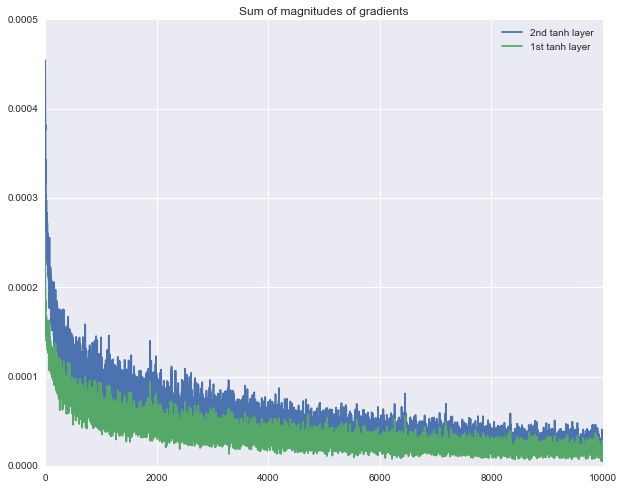

In [28]:
plt.plot(model.gradientLayer2)
plt.plot(model.gradientLayer1)
plt.title('Sum of magnitudes of gradients')
plt.legend(("2nd tanh layer", "1st tanh layer"))

In [29]:
print(model.accuracy(X_val,y_val))

0.947301587302


Training 2 hidden layer Neural Network with Sigmoid non-linearity on MNIST data

In [30]:
sigmoid_model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='sigmoid')

In [31]:
sigmoid_model.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.35)

Iteration 0, loss = 3.394315
Validation Accuracy :0.063889
Iteration 500, loss = 0.743179
Validation Accuracy :0.868095
Iteration 1000, loss = 0.744637
Validation Accuracy :0.899048
Iteration 1500, loss = 0.654176
Validation Accuracy :0.911111
Iteration 2000, loss = 0.618405
Validation Accuracy :0.918730
Iteration 2500, loss = 0.635510
Validation Accuracy :0.924762
Iteration 3000, loss = 0.561782
Validation Accuracy :0.929841
Iteration 3500, loss = 0.567593
Validation Accuracy :0.932778
Iteration 4000, loss = 0.617145
Validation Accuracy :0.935952
Iteration 4500, loss = 0.536183
Validation Accuracy :0.937857
Iteration 5000, loss = 0.523908
Validation Accuracy :0.940000
Iteration 5500, loss = 0.487078
Validation Accuracy :0.942063
Iteration 6000, loss = 0.553905
Validation Accuracy :0.944444
Iteration 6500, loss = 0.589936
Validation Accuracy :0.943810
Iteration 7000, loss = 0.564682
Validation Accuracy :0.946270
Iteration 7500, loss = 0.558965
Validation Accuracy :0.946984
Iteration 80

Plotting the mean absolute gradient at the 2 sigmoid layers

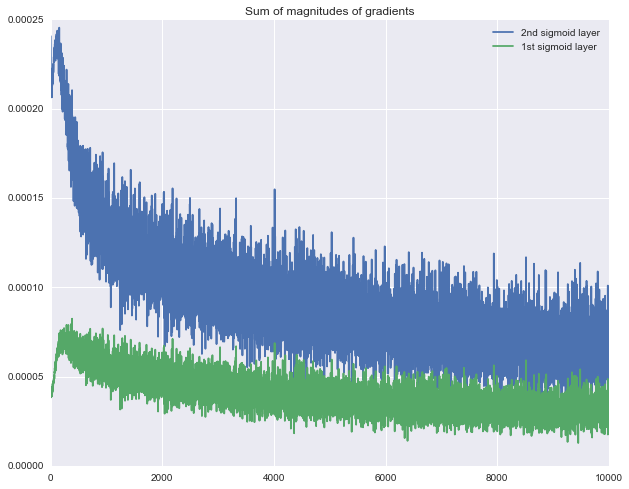

In [32]:
plt.plot(sigmoid_model.gradientLayer2)
plt.plot(sigmoid_model.gradientLayer1)
plt.title('Sum of magnitudes of gradients')
plt.legend(("2nd sigmoid layer", "1st sigmoid layer"))

In [33]:
print(sigmoid_model.accuracy(X_val,y_val))

0.949365079365


Training 2 hidden layer Neural Network with Relu non-linearity on MNIST data

In [34]:
relu_model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='relu')

In [35]:
relu_model.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.35)

Iteration 0, loss = 6.646830
Validation Accuracy :0.083492
Iteration 500, loss = 0.537241
Validation Accuracy :0.911746
Iteration 1000, loss = 0.553561
Validation Accuracy :0.931270
Iteration 1500, loss = 0.544118
Validation Accuracy :0.940476
Iteration 2000, loss = 0.500881
Validation Accuracy :0.942540
Iteration 2500, loss = 0.425765
Validation Accuracy :0.946667
Iteration 3000, loss = 0.434495
Validation Accuracy :0.944206
Iteration 3500, loss = 0.419646
Validation Accuracy :0.949048
Iteration 4000, loss = 0.393443
Validation Accuracy :0.951508
Iteration 4500, loss = 0.423228
Validation Accuracy :0.950556
Iteration 5000, loss = 0.414493
Validation Accuracy :0.952698
Iteration 5500, loss = 0.397374
Validation Accuracy :0.951508
Iteration 6000, loss = 0.387433
Validation Accuracy :0.951349
Iteration 6500, loss = 0.387152
Validation Accuracy :0.951508
Iteration 7000, loss = 0.368603
Validation Accuracy :0.951111
Iteration 7500, loss = 0.370346
Validation Accuracy :0.952698
Iteration 80

Plotting the mean absolute gradient at the 2 relu layers

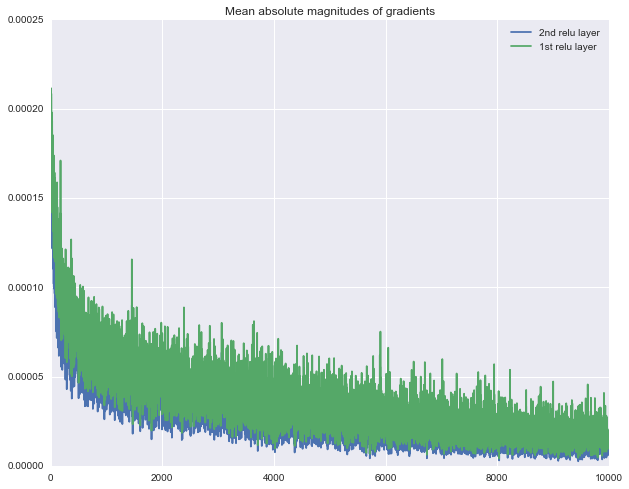

In [44]:
plt.plot(relu_model.gradientLayer2[10:])
plt.plot(relu_model.gradientLayer1[10:])
plt.title('Mean absolute magnitudes of gradients')
plt.legend(("2nd relu layer", "1st relu layer"))

In [39]:
print(relu_model.accuracy(X_val,y_val))

0.952857142857


Plot of loss function of 3 non-linearities

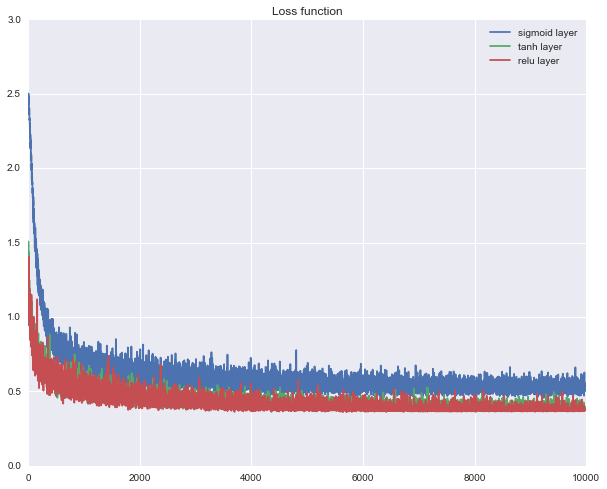

In [40]:
plt.plot(sigmoid_model.loss_history[25:])
plt.plot(model.loss_history[25:])
plt.plot(relu_model.loss_history[25:])
plt.title('Loss function')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

Plot of mean absolute gradient at the 2nd hidden layer for different non-linearities

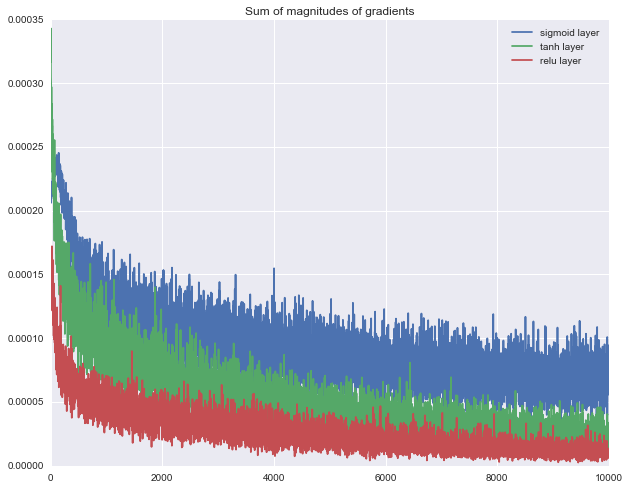

In [42]:
plt.plot(sigmoid_model.gradientLayer2[10:])
plt.plot(model.gradientLayer2[10:])
plt.plot(relu_model.gradientLayer2[10:])
plt.title('Sum of magnitudes of gradients')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

Plot of mean absolute gradient at the 1st hidden layer for different non-linearities

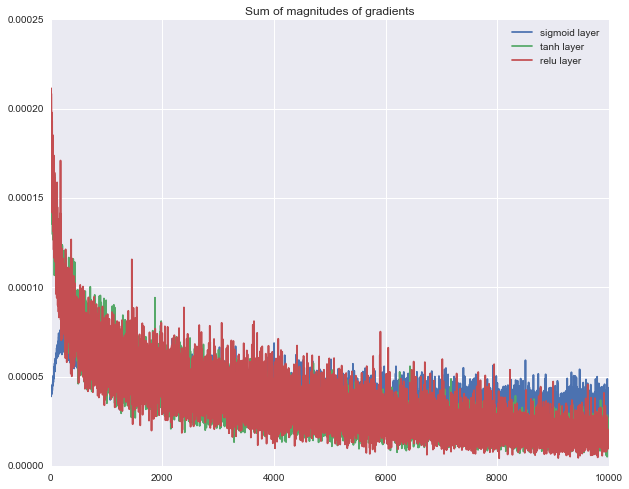

In [48]:
plt.plot(sigmoid_model.gradientLayer1[10:])
plt.plot(model.gradientLayer1[10:])
plt.plot(relu_model.gradientLayer1[10:])
plt.title('Sum of magnitudes of gradients')
plt.legend(("sigmoid layer","tanh layer","relu layer"))